Training Accuracy: 1.0
Testing Accuracy: 0.8787878787878788
Accuracy:  0.8787878787878788
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        30
           1       0.89      0.89      0.89        36

    accuracy                           0.88        66
   macro avg       0.88      0.88      0.88        66
weighted avg       0.88      0.88      0.88        66



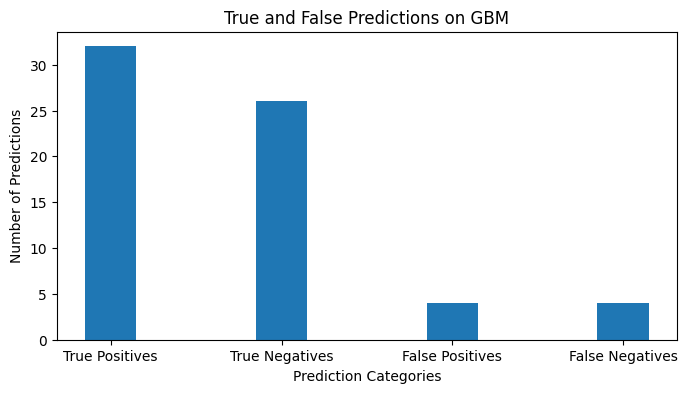

In [ ]:
# Gradient Boosting Machine
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Read the CSV file
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HD/Heart Disease Dataset.csv")

# Check for missing values and fill with the mean value of each column
data.fillna(data.mean(), inplace=True)

# Convert continuous target variable into binary classes
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)

# Preparing input and output data
x = data[['Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
          'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = data['num']

# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# Normalize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_resampled)

# Split the scaled features into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_resampled, test_size=0.2, random_state=42)

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
gbm = GradientBoostingClassifier(random_state=42)
rs = RandomizedSearchCV(gbm, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1)
rs.fit(x_train, y_train)
model = rs.best_estimator_

# Predict on the test data
y_pred = model.predict(x_test)

# Calculate training and testing accuracy
acc_train = model.score(x_train, y_train)
print("Training Accuracy:", acc_train)

acc_test = model.score(x_test, y_test)
print("Testing Accuracy:", acc_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Calculate F1 score, recall, and precision
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Plot the bar graph for true and false predictions
categories = ['True Positives', 'True Negatives', 'False Positives', 'False Negatives']
values = [tp, tn, fp, fn]

plt.figure(figsize=(8, 4))
plt.bar(categories, values, width=0.3)
plt.xlabel('Prediction Categories')
plt.ylabel('Number of Predictions')
plt.title('True and False Predictions on GBM')
plt.show()